In [5]:
import pandas as pd

df = pd.read_csv("../data/benin-malanville.csv") 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [6]:
# Numeric summary
df.describe()

# Missing values
df.isna().sum()

# Columns with >5% missing
missing_pct = df.isna().mean() * 100
missing_pct[missing_pct > 5]


Comments    100.0
dtype: float64

In [7]:
from scipy import stats
import numpy as np

cols_to_check = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = np.abs(stats.zscore(df[cols_to_check], nan_policy='omit'))

# Flag rows with any |Z| > 3
df['outlier_flag'] = (z_scores > 3).any(axis=1)


In [8]:
# Impute median for key numeric columns
for col in cols_to_check:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1752\4183300776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1752\4183300776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [9]:
df.to_csv("../data/benin_clean.csv", index=False)
# Ensure data/ is in .gitignore


Matplotlib is building the font cache; this may take a moment.
c:\Users\Admin\OneDrive\Documents\KAIM_C8_course\Week_0\solar-challenge-week0\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


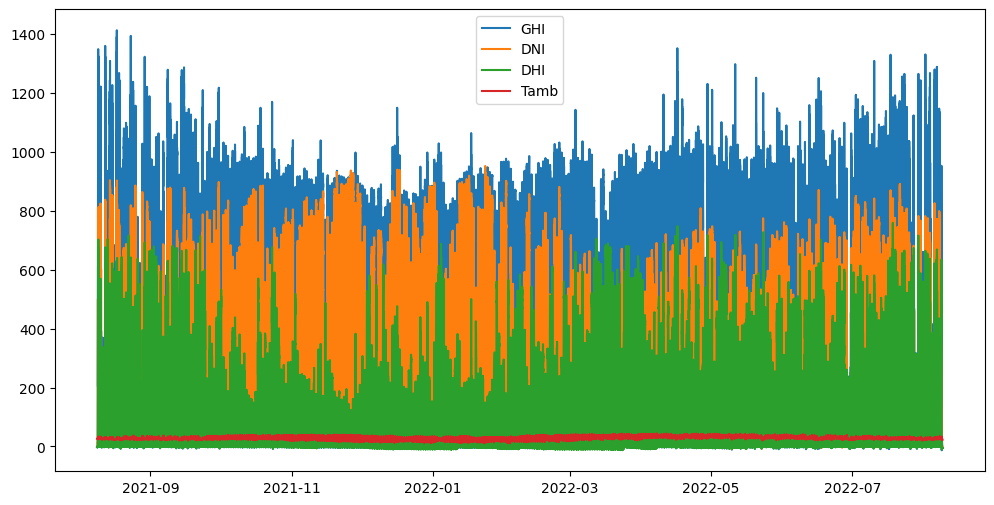

C:\Users\Admin\AppData\Local\Temp\ipykernel_1752\10565363.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Timestamp').resample('M').mean()[['GHI', 'DNI', 'DHI']].plot()


<Axes: xlabel='Timestamp'>

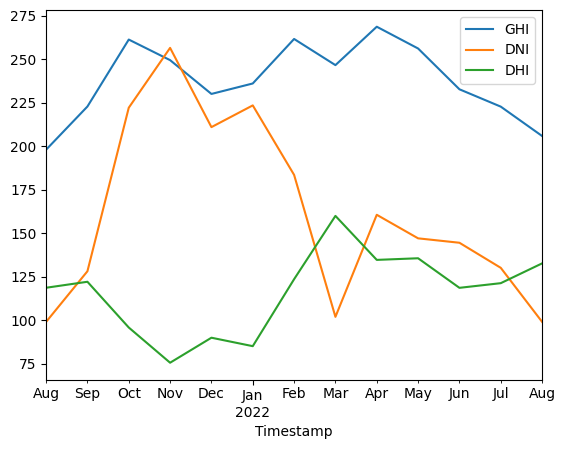

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Line chart of GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.legend()
plt.show()

# Optional: resample by month or hour
df.set_index('Timestamp').resample('M').mean()[['GHI', 'DNI', 'DHI']].plot()


<Axes: xlabel='outlier_flag', ylabel='ModA'>

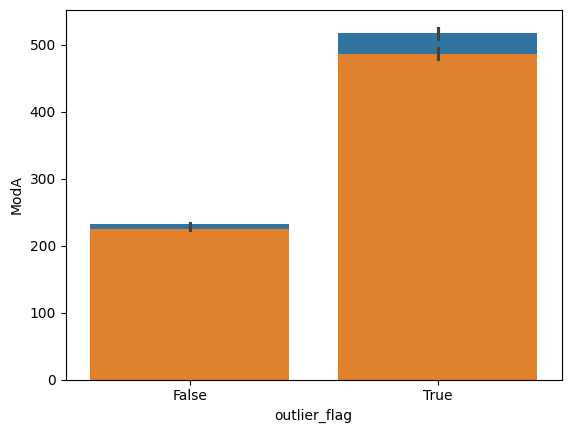

In [11]:
# Compare ModA & ModB pre/post-cleaning
sns.barplot(data=df, x='outlier_flag', y='ModA')
sns.barplot(data=df, x='outlier_flag', y='ModB')


<Axes: xlabel='WS', ylabel='GHI'>

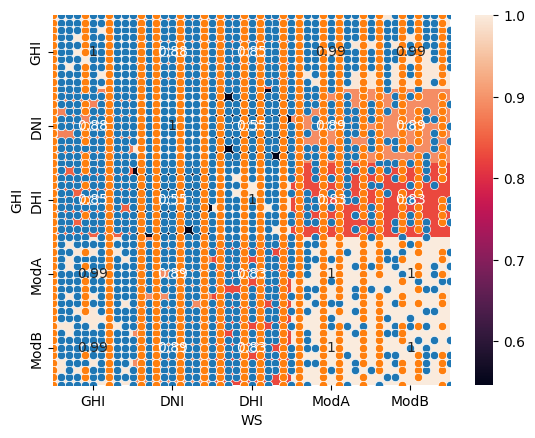

In [12]:
# Correlation heatmap
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True)

# Scatter plots
sns.scatterplot(data=df, x='WS', y='GHI')
sns.scatterplot(data=df, x='WSgust', y='GHI')
sns.scatterplot(data=df, x='RH', y='Tamb')
sns.scatterplot(data=df, x='RH', y='GHI')


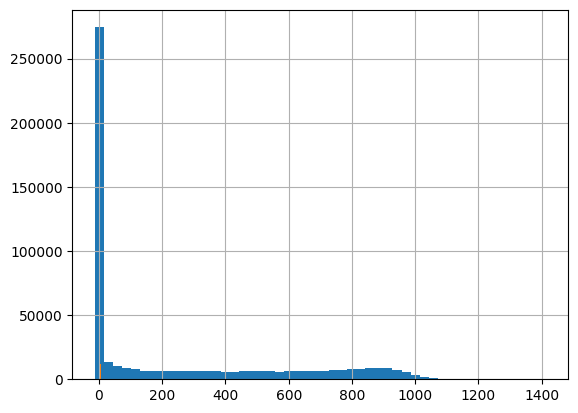

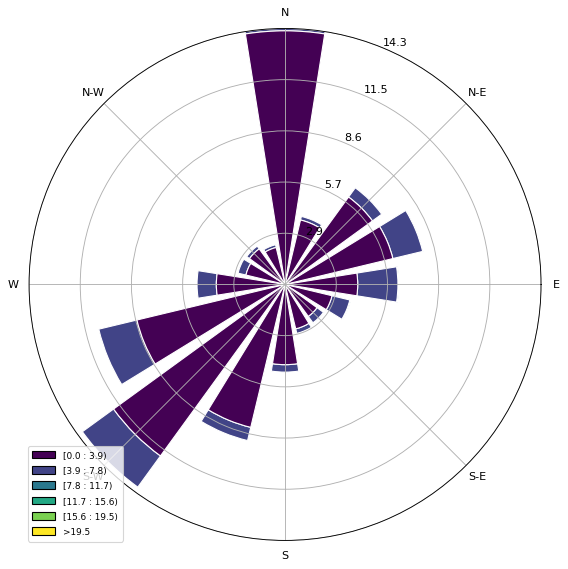

In [13]:
# Histogram
df['GHI'].hist(bins=50)
df['WS'].hist(bins=50)

# Optional wind rose (requires windrose package)
# pip install windrose
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()


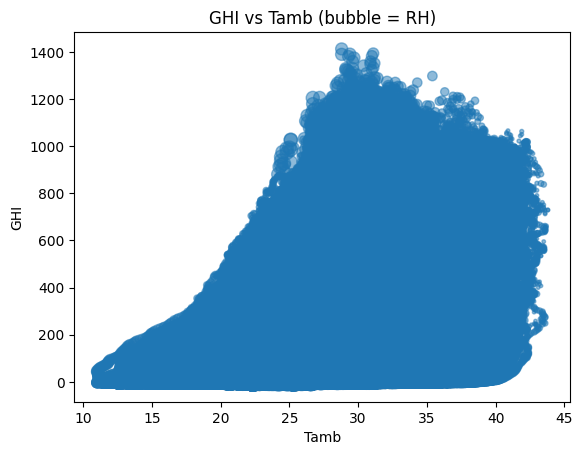

In [14]:
# Bubble chart: GHI vs Tamb, bubble size = RH
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (bubble = RH)')
plt.show()
